In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #bypass certificate verification

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

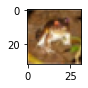

In [11]:
plot_sample(0)

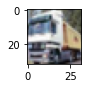

In [12]:
plot_sample(1)

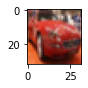

In [13]:
plot_sample(5)

In [15]:
classes = ["airplane", "automibile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [16]:
y_train[3]

array([4], dtype=uint8)

In [18]:
classes[y_train[3][0]]

'deer'

In [21]:
#scalling the images

x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [19]:
# y is discrete and we need to convert it into categorical using oneHotEncoding

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
32*32*3

3072

In [22]:
#model building
# the we have to flatten the data into one signle input array using Flatten
# It'll use linear if we don't specify the activation function

model =  keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    
    #hiden layers and we choose val =3000 ~=32832*3 flatten samples. More hiden layers tend to improve the result/score
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', #SGD is good here as we have more sample
             loss='categorical_crossentropy', # categorical coz we used OneHodEncoding
             metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 69s 44ms/step - loss: 1.8053 - accuracy: 0.3596
Epoch 2/50
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6175 - accuracy: 0.4306
Epoch 3/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5374 - accuracy: 0.4591
Epoch 4/50
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4741 - accuracy: 0.4833
Epoch 5/50
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4237 - accuracy: 0.4991
Epoch 6/50
1563/1563 [==============================] - 68s 44ms/step - loss: 1.3794 - accuracy: 0.5168
Epoch 7/50
1563/1563 [==============================] - 68s 43ms/step - loss: 1.3410 - accuracy: 0.5278
Epoch 8/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.3047 - accuracy: 0.5444
Epoch 9/50
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2706 - accuracy: 0.5554
Epoch 10/50
1563/1563 [==============================] - 67s 43m

In [26]:
classes[np.argmax(model.predict(x_test_scaled)[0])]

'cat'

In [24]:
classes[y_test[0][0]]

'cat'

In [ ]:
model.evaluate(x_tes)

In [27]:
def get_model():
    model =  keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
    
        #hiden layers and we choose val =3000 ~=32832*3 flatten samples. More hiden layers tend to improve the result/score
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD', #SGD is good here as we have more sample
             loss='categorical_crossentropy', # categorical coz we used OneHodEncoding
             metrics=['accuracy'])
    
    return model

In [28]:
#run with CPU
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 71s 45ms/step - loss: 1.8058 - accuracy: 0.3593
